In [12]:
import sys
import os
sys.path.append(os.path.abspath('../..'))


# from scan_engine.status_fields_config_24summ import STATUS_FIELDS_CONFIG
from status_fields_config_oct3v1_brws_250522 import STATUS_FIELDS_CONFIG

from utlis.scan_engine_utlis.scan_eng_big_utlis import log_folder_to_parquet_sep

if __name__ == "__main__":
    base_folder = "/hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/24summ" #"/hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/25socialmini" #'/hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/Oct3V1' #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Replace with your base folder
    # save_path = os.path.join(base_folder, 'paret')
    failed_paths_file = None # "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/sync_failed.txt" #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/sync_failed_brws.txt'  # File containing failed paths

    force_rescan_rec_files = [
        # ('2023-10-01', '001'),
        # ('2023-10-02', '002'),
        # Add more as needed
    ]
    rescan_threshold_days = 0.001 # 7 days, but guess if i mess up i can just change it to automatically rescan all, smile... #0.1

    log_folder_to_parquet_sep(base_folder, failed_paths_file, STATUS_FIELDS_CONFIG,
                              force_rescan_rec_files=force_rescan_rec_files,
                              rescan_threshold_days=rescan_threshold_days)


Log for 20240717_PMC_r1_11_50 saved at /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_16/20240717_PMC_r1_11_50/folder_log.parquet
Log for 20240717_PMC_r2_11_00 saved at /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_16/20240717_PMC_r2_11_00/folder_log.parquet
Log for 1686940_left_right saved at /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_06_25/1686940_left_right/folder_log.parquet
Log for 1686940_left_right_2 saved at /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_06_25/1686940_left_right_2/folder_log.parquet
Log for 20240717_PMCr1 saved at /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240717_PMCr1/folder_log.parquet
Log for 20240730_PMCr2 saved at /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240730_PMCr2/folder_log.parquet
Log for 20240717_PMCr2 saved at /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240717_PMCr2/folder_log.parquet
Log for 20240628_PMC_r1_11_43 saved

In [13]:
sys.path.append(os.path.abspath('../..'))
from utlis.scan_engine_utlis.scan_engine_utlis import read_all_parquet_files
# base_folder = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1"
all_df = read_all_parquet_files(base_folder)

In [ ]:
#this is wrong. this will remove thigs with repetitive names... which is sort of wrong...

# import os
# import glob

# def validate_and_map_calibs(rec_paths):
#     """
#     For each rec_path, find the first *label3d_dannce.mat file,
#     strip off any duplicated prefixes, and detect buggy repeats.

#     Returns:
#       mapping: dict where mapping[rec_path] = clean_filename or None
#       wrong:   list of (rec_path, full_path) tuples for any repeats found
#     """
#     mapping = {}
#     wrong = []

#     for entry in rec_paths:
#         # support either [path] or plain string
#         dir_path = entry[0] if isinstance(entry, (list, tuple)) else entry

#         # find any label3d_dannce.mat under that folder
#         pattern = os.path.join(dir_path, "*label3d_dannce.mat")
#         matches = glob.glob(pattern)

#         if not matches:
#             mapping[dir_path] = None
#             continue

#         full_path = matches[0]
#         fname     = os.path.basename(full_path)
#         rec_folder= os.path.basename(dir_path)

#         # count how many times the folder name appears
#         occ = fname.count(rec_folder)
#         if occ > 1:
#             # buggy repetition detected
#             wrong.append((dir_path, full_path))

#         # strip everything before the **last** occurrence of rec_folder
#         if rec_folder in fname:
#             last_idx = fname.rfind(rec_folder)
#             clean = fname[last_idx:]
#         else:
#             clean = fname

#         mapping[dir_path] = clean

#     return mapping, wrong

# # --- usage example ---
# rec_paths = all_df.column("rec_path").to_pylist()
# mapping, wrong_entries = validate_and_map_calibs(rec_paths)




In [ ]:
#the corrected one, prob no use though.....

import os
import glob

def validate_and_map_calibs(rec_paths):
    """
    For each rec_path, find the first *label3d_dannce.mat file,
    strip off any duplicated prefixes, and flag only those files
    whose names contain 'df_synced_' at least twice.

    Returns:
      mapping: dict where mapping[rec_path] = clean_filename or None
      wrong:   list of (rec_path, full_path) tuples for any files
               with two or more 'df_synced_' occurrences
    """
    mapping = {}
    wrong = []

    for entry in rec_paths:
        dir_path = entry[0] if isinstance(entry, (list, tuple)) else entry

        # locate the label3d_dannce file
        pattern = os.path.join(dir_path, "*label3d_dannce.mat")
        matches = glob.glob(pattern)

        if not matches:
            mapping[dir_path] = None
            continue

        full_path = matches[0]
        fname = os.path.basename(full_path)
        rec_folder = os.path.basename(dir_path)

        # only flag as wrong if 'df_synced_' appears two or more times
        if fname.count('df_synced_') > 1:
            wrong.append((dir_path, full_path))

        # produce a clean name by stripping everything before
        # the last occurrence of the folder name
        if rec_folder in fname:
            last_idx = fname.rfind(rec_folder)
            clean = fname[last_idx:]
        else:
            clean = fname

        mapping[dir_path] = clean

    return mapping, wrong

# --- usage example ---
rec_paths = all_df.column("rec_path").to_pylist()
rec_paths = [p for p in rec_paths if p is not None]
mapping, wrong_entries = validate_and_map_calibs(rec_paths)


In [18]:
import shutil

# # 1) see your full rec_path → clean filename
# for path, clean_name in mapping.items():
#     print(f"{path}  →  {clean_name}")

# 2) list out only the ones with repeated folder names
if wrong_entries:
    print("\nFound buggy repeats in these folders:")
    for path, full_path in wrong_entries:
        print(f" • {path}  →  {full_path}")

#     # 3) if you’re ready to delete those bad files, uncomment below:
#     for _, bad_file in wrong_entries:
#         os.remove(bad_file)
#         print("Deleted", bad_file)
#         shutil.rmtree(os.path.join(os.path.dirname(bad_file), 'prev_calib'), ignore_errors=True)
#         print("Deleted", os.path.join(os.path.dirname(bad_file), 'prev_calib'))
#         shutil.rmtree(os.path.join(os.path.dirname(bad_file), 'COM'), ignore_errors=True)
#         print("Deleted", os.path.join(os.path.dirname(bad_file), 'COM'))

#         shutil.rmtree(os.path.join(os.path.dirname(bad_file), 'DANNCE'), ignore_errors=True)
#         print("Deleted", os.path.join(os.path.dirname(bad_file), 'DANNCE'))
        
#         shutil.rmtree(os.path.join(os.path.dirname(bad_file), 'MIR_Aligned'), ignore_errors=True)
#         print("Deleted", os.path.join(os.path.dirname(bad_file), 'MIR_Aligned'))



In [ ]:
import os
import glob

def validate_and_map_calibs(rec_paths):
    """
    For each rec_path, find the first *label3d_dannce.mat file,
    strip off any duplicated prefixes, and detect buggy repeats.

    Returns:
      mapping: dict where mapping[rec_path] = clean_filename or None
      wrong:   list of (rec_path, full_path) tuples for any repeats found
    """
    mapping = {}
    wrong = []

    for entry in rec_paths:
        # support either [path] or plain string
        dir_path = entry[0] if isinstance(entry, (list, tuple)) else entry

        # find any label3d_dannce.mat under that folder
        pattern = os.path.join(dir_path, "*label3d_dannce.mat")
        matches = glob.glob(pattern)

        if not matches:
            mapping[dir_path] = None
            continue

        full_path = matches[0]
        fname     = os.path.basename(full_path)
        rec_folder= os.path.basename(dir_path)

        # count how many times the folder name appears
        occ = fname.count(rec_folder)
        if occ > 1:
            # buggy repetition detected
            wrong.append((dir_path, full_path))

        # strip everything before the **last** occurrence of rec_folder
        if rec_folder in fname:
            last_idx = fname.rfind(rec_folder)
            clean = fname[last_idx:]
        else:
            clean = fname

        mapping[dir_path] = clean

    return mapping, wrong

# --- usage example ---
rec_paths = all_df.column("rec_path").to_pylist()
mapping, wrong_entries = validate_and_map_calibs(rec_paths)




In [ ]:
import shutil

# # 1) see your full rec_path → clean filename
# for path, clean_name in mapping.items():
#     print(f"{path}  →  {clean_name}")

# 2) list out only the ones with repeated folder names
if wrong_entries:
    print("\nFound buggy repeats in these folders:")
    for path, full_path in wrong_entries:
        print(f" • {path}  →  {full_path}")

    # 3) if you’re ready to delete those bad files, uncomment below:
    for _, bad_file in wrong_entries:
        # os.remove(bad_file)
        # print("Deleted", bad_file)
        shutil.rmtree(os.path.join(os.path.dirname(bad_file), 'prev_calib'), ignore_errors=True)
        print("Deleted", os.path.join(os.path.dirname(bad_file), 'prev_calib'))


In [5]:
import pyarrow.compute as pc
table = all_df #combined_df
# Filter mir_generate_param == 0 and sync != 3
filter_mask = pc.and_(
    pc.equal(table['social'], '1'),
    pc.not_equal(table['sync'], '3')
)

# Apply the filter and print the results
for_social = table.filter(pc.equal(table['social'], '1'))

# Print each row of the filtered table
print(for_social.to_pandas())  # This will display the filtered data in a familiar pandas-like format


   mir_generate_param sync mini_6cam_map dropf_handle com social miniscope  \
0                   1    1             0            0   0      1         1   
1                   1    1             0            0   0      1         1   
2                   1    1             0            0   0      1         1   
3                   1    1             0            0   0      1         1   
4                   1    1             0            0   0      1         1   
5                   1    1             0            0   0      1         1   
6                   1    1             0            0   0      1         1   
7                   1    1             0            0   0      1         1   
8                   1    1             0            0   0      1         1   
9                   1    1             0            0   0      1         1   
10                  1    1             1            0   0      1         1   
11                  1    1             1            0   0      1

In [6]:
import pyarrow.compute as pc
table = all_df #combined_df
# Filter mir_generate_param == 0 and sync != 3
filter_mask = pc.and_(
    pc.equal(table['mir_generate_param'], '0'),
    pc.not_equal(table['sync'], '3')
)

# Apply the filter and print the results
filtered_table = table.filter(filter_mask)

# Print each row of the filtered table
print(filtered_table.to_pandas())  # This will display the filtered data in a familiar pandas-like format


  mir_generate_param sync mini_6cam_map dropf_handle com social miniscope  \
0                  0    0             0            0   0      0         1   
1                  0    0             0            0   0      0         1   

  test dannce mini_rec_sync                  rec_file  \
0    0      0             0        20240819V1r1_20_48   
1    0      0             0  20241212v1l1r2mini_11_56   

                    scan_time date_folder  \
0  2025-05-22T15:59:08.165906  2024_10_08   
1  2025-05-22T15:59:08.090934  2024_12_31   

                                         calib_files  
0  [calib_before_19_33, calib_before, calib_after...  
1                                     [calib_before]  


In [7]:
import os
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import datetime
import sys
sys.path.append(os.path.abspath('../..'))
from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z

# Function to process each "unit" (rec_file) and update its status in the corresponding Parquet file
def process_unit_and_update_status(rec_file_data, base_folder):
    date_folder = rec_file_data['date_folder']
    rec_file = rec_file_data['rec_file']
    
    # Generate the paths needed for processing
    combined_path = os.path.join(base_folder, date_folder)
    calib_path = rec_file_data['calib_path'] if 'calib_path' in rec_file_data else os.path.join(combined_path, 'calib_before') #calib_before*
    calib_path = os.path.join(base_folder, date_folder, calib_path)
    if not calib_path:  # Check for empty or None calib_path
        print(f'No calib folder found. Aborting. {combined_path}/{rec_file}')
        return
    
    output_file = f'{os.path.basename(date_folder)}_{rec_file}_{os.path.basename(calib_path)}_label3d_dannce.mat'

    # Call your processing function
    ssssta = mir_generate_param_z(combined_path, calib_path, rec_file, output_file)
    print("mir_generate_param ran successfully.")

    # After processing, update the status in the specific Parquet file
    parquet_file_path = os.path.join(base_folder, date_folder, rec_file, "folder_log.parquet")

    # Load the existing Parquet file
    try:
        table = pq.read_table(parquet_file_path)
        df = table.to_pandas()  # Convert to pandas for easier manipulation
    except FileNotFoundError:
        print(f"Parquet file not found at {parquet_file_path}")
        return

    if ssssta is True:
        # Update the status field (assuming 'sync' is the column)
        df['mir_generate_param'] = '1'  # Set status to '1' for processed

        # Add scan_time (or other updates)
        df['scan_time'] = datetime.datetime.now().isoformat()

        # Write the updated DataFrame back to the Parquet file
        updated_table = pa.Table.from_pandas(df)
        pq.write_table(updated_table, parquet_file_path)

        print(f"Updated Parquet file at {parquet_file_path} with new status.")
    else:
        print(f'processed failed. please check {combined_path}/{rec_file}')

# Function to handle sequential processing and status updates
def sequential_process_and_update(filtered_table, base_folder):
    # Convert PyArrow table to pandas DataFrame
    filtered_df = filtered_table.to_pandas()

    # Process each row sequentially
    for row in filtered_df.itertuples(index=False):
        try:
            process_unit_and_update_status(row._asdict(), base_folder)
        except Exception as e:
            print(f"Error in processing: {e}")

# Example function call
# filtered_table = [...]  # Your filtered PyArrow table here
# base_folder = '/path/to/your/base_folder'
sequential_process_and_update(filtered_table, base_folder)


Found 6 calibration files.
Error opening video file.
mir_generate_param ran successfully.
processed failed. please check /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240819V1r1_20_48
Found 6 calibration files.
Error opening video file.
mir_generate_param ran successfully.
processed failed. please check /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_12_31/20241212v1l1r2mini_11_56


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x563742a5a9c0] moov atom not found


In [10]:
import pyarrow.compute as pc
table = all_df #combined_df
# Filter mir_generate_param == 0 and sync != 3
filter_mask = pc.and_(
    # pc.equal(table['mir_generate_param'], '1'),
    pc.not_equal(table['sync'], '3'),
    pc.equal(table['sync'], '0')
)

# Apply the filter and print the results
filtered_table_for_sync = table.filter(filter_mask) # seems that one can just be here. other wise filter mask or something.

# Print each row of the filtered table
print(filtered_table_for_sync.to_pandas())  # This will display the filtered data in a familiar pandas-like format

  mir_generate_param sync mini_6cam_map dropf_handle com social miniscope  \
0                  1    0             0            0   0      0         1   
1                  0    0             0            0   0      0         1   
2                  1    0             0            0   0      0         1   
3                  1    0             1            0   0      0         1   
4                  0    0             0            0   0      0         1   
5                  1    0             1            0   0      0         1   
6                  1    0             1            0   0      1         1   
7                  1    0             0            0   0      0         1   
8                  1    0             0            0   0      1         1   

  test dannce mini_rec_sync                                rec_file  \
0    0      0             0                      20240916v1r1_19_18   
1    0      0             0                      20240819V1r1_20_48   
2    0      0   

In [ ]:
# import os
# import glob
# import pyarrow.parquet as pq
# import pyarrow as pa

# rec_paths = all_df.column("rec_path").to_pylist()

# calib_names = []
# for entry in rec_paths:
#     # get the actual directory string
#     dir_path = entry[0] if isinstance(entry, list) else entry

#     # 3. find any file ending with label3d_dannce.mat
#     pattern = os.path.join(dir_path, "*label3d_dannce.mat")
#     matches = glob.glob(pattern)

#     if not matches:
#         calib_names.append(None)
#         continue

#     # pick the first match
#     fname = os.path.basename(matches[0])

#     # 4. strip off buggy 'df_df_' prefix if present
#     if fname.startswith("df_df_"):
#         fname = fname[len("df_df_"):]

#     calib_names.append(fname)

KeyError: 'Field "rec_path" does not exist in schema'

In [ ]:
calib_names

Processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_07/20240916v1r1_19_18


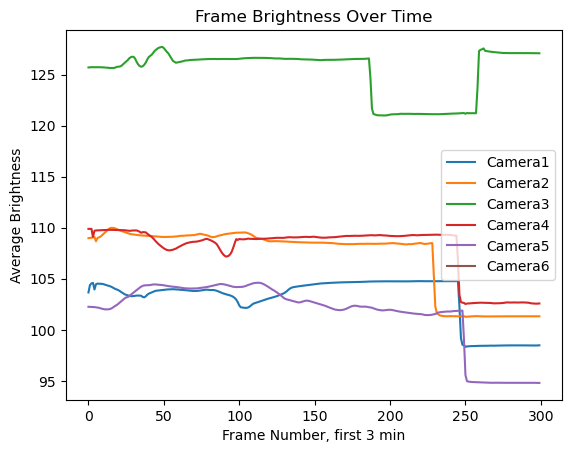

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_07/20240916v1r1_19_18: {'Camera1': [246, 247], 'Camera2': [229, 230], 'Camera3': [188], 'Camera4': [245, 246], 'Camera5': [249, 250], 'Camera6': []}
Skipping process_calibration_data for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_07/20240916v1r1_19_18 due to missing drop frames
please mannually process /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_07/20240916v1r1_19_18
Failed processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_07/20240916v1r1_19_18, status set to 3.
Updated Parquet file at /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_07/20240916v1r1_19_18/folder_log.parquet with new status.
Processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_15_53


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x563743de6780] moov atom not found


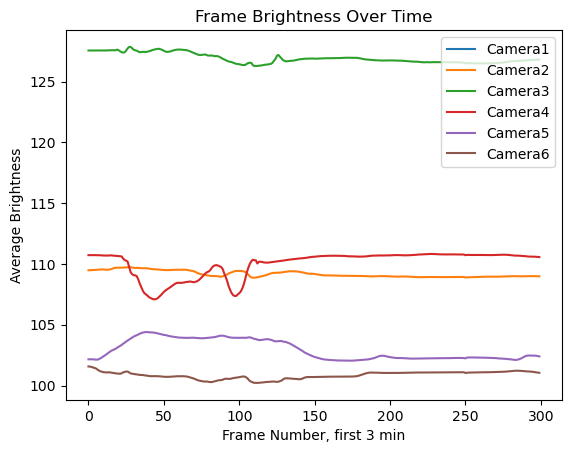

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_15_53: {'Camera1': [], 'Camera2': [], 'Camera3': [], 'Camera4': [], 'Camera5': [], 'Camera6': []}
Skipping process_calibration_data for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_15_53 due to missing drop frames
please mannually process /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_15_53
Failed processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_15_53, status set to 3.
Updated Parquet file at /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_15_53/folder_log.parquet with new status.
Processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/20241015pmcr1_AO_14_52


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x563743da2280] moov atom not found


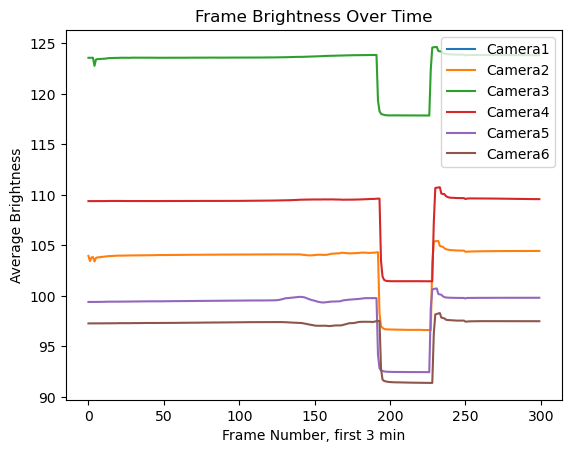

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/20241015pmcr1_AO_14_52: {'Camera1': [], 'Camera2': [193], 'Camera3': [192], 'Camera4': [194], 'Camera5': [192], 'Camera6': [194]}
Skipping process_calibration_data for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/20241015pmcr1_AO_14_52 due to missing drop frames
please mannually process /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/20241015pmcr1_AO_14_52
Failed processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/20241015pmcr1_AO_14_52, status set to 3.
Updated Parquet file at /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/20241015pmcr1_AO_14_52/folder_log.parquet with new status.
Processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_02_27/20241002PMCLE1mini_13_59


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x563743da0a00] moov atom not found


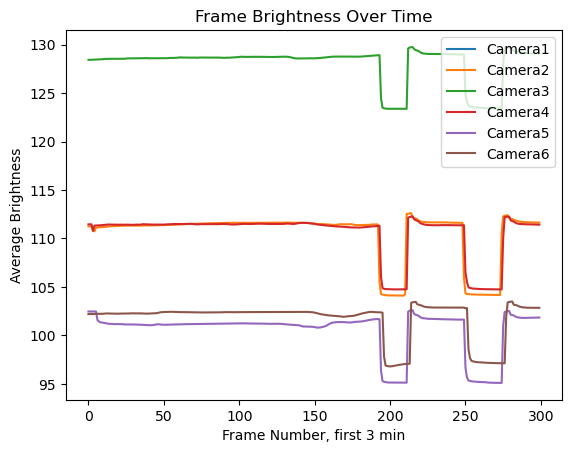

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_02_27/20241002PMCLE1mini_13_59: {'Camera1': [], 'Camera2': [193, 249], 'Camera3': [194, 250], 'Camera4': [194, 250], 'Camera5': [194, 250], 'Camera6': [196, 252]}
Skipping process_calibration_data for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_02_27/20241002PMCLE1mini_13_59 due to missing drop frames
please mannually process /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_02_27/20241002PMCLE1mini_13_59
Failed processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_02_27/20241002PMCLE1mini_13_59, status set to 3.
Updated Parquet file at /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_02_27/20241002PMCLE1mini_13_59/folder_log.parquet with new status.
Processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC1_14_21


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x563743746980] moov atom not found


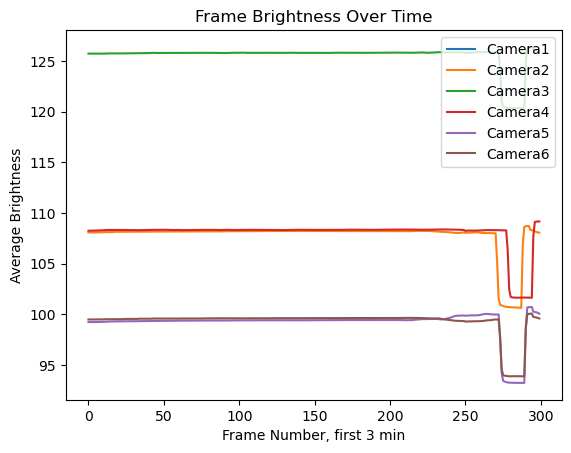

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC1_14_21: {'Camera1': [], 'Camera2': [271, 272], 'Camera3': [274], 'Camera4': [279], 'Camera5': [273, 274], 'Camera6': [274]}
Skipping process_calibration_data for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC1_14_21 due to missing drop frames
please mannually process /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC1_14_21
Failed processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC1_14_21, status set to 3.
Updated Parquet file at /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC1_14_21/folder_log.parquet with new status.
Processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_01/20250324PMCB_14_31


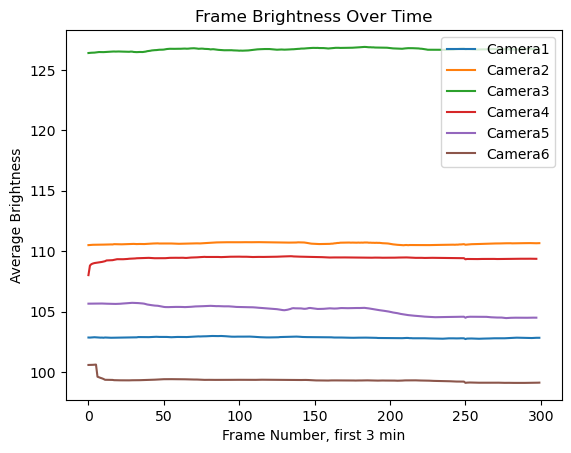

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_01/20250324PMCB_14_31: {'Camera1': [], 'Camera2': [], 'Camera3': [], 'Camera4': [], 'Camera5': [], 'Camera6': []}
Skipping process_calibration_data for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_01/20250324PMCB_14_31 due to missing drop frames
please mannually process /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_01/20250324PMCB_14_31
Failed processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_01/20250324PMCB_14_31, status set to 3.
Updated Parquet file at /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_01/20250324PMCB_14_31/folder_log.parquet with new status.
Processing: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1


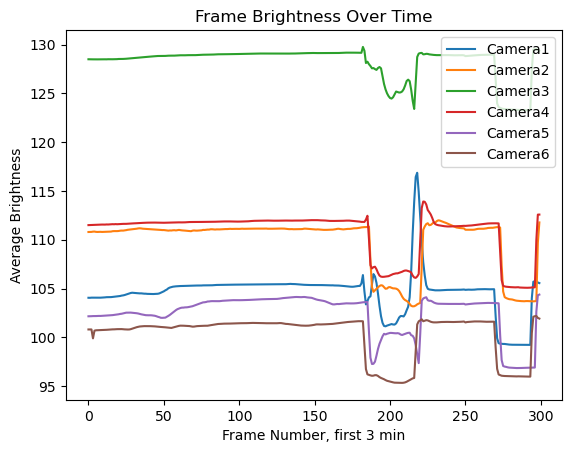

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1: {'Camera1': [220, 221, 222, 270, 271], 'Camera2': [187, 188, 274, 275], 'Camera3': [270, 271], 'Camera4': [186, 187, 273, 274], 'Camera5': [186, 187, 273, 274], 'Camera6': [183, 184, 270, 271]}
Processed drop frames: {'Camera1': 221, 'Camera2': 188, 'Camera3': 271, 'Camera4': 187, 'Camera5': 187, 'Camera6': 184}
184
alined data saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1/df_synced_20250324PMCBmini_p20250324LE1_2025_05_14_20250324PMCBmini_p20250324LE1_calib_before_label3d_dannce.mat
Alignment successful for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1
Error during alignment: Destination path '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1/prev_calib/2025_05_14_20250324PMCBmini_p20250324LE1_calib_before_label3d_dannce.mat' alre

In [9]:
import os
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import datetime
import sys
sys.path.append(os.path.abspath('../..'))
from utlis.sync_utlis.sync_df_utlis import process_sync

# Function to process each "unit" (rec_file) and update its status in the corresponding Parquet file sequentially
def process_unit_and_update_status(rec_file_data, base_folder):
    date_folder = rec_file_data['date_folder']
    rec_file = rec_file_data['rec_file']
    
    # Generate the paths needed for processing
    combined_path = os.path.join(base_folder, date_folder, rec_file)
    calib_path = rec_file_data.get('calib_path', os.path.join(base_folder, 'calib_before'))
    
    if not calib_path:
        print(f'No calib folder found. Aborting. {combined_path}')
        return
    
    output_file = f'{os.path.basename(date_folder)}_{rec_file}_{os.path.basename(calib_path)}_label3d_dannce.mat'
    print(f"Processing: {combined_path}")
    
    # Call the sync processing function
    sync_status = process_sync(combined_path, threshold=2, max_frames=300)
    if sync_status is True:
        print("Sync ran successfully.")
    else:
        print(f"please mannually process {combined_path}")

    # Update the status in the Parquet file
    parquet_file_path = os.path.join(base_folder, date_folder, rec_file, "folder_log.parquet")

    try:
        table = pq.read_table(parquet_file_path)
        df = table.to_pandas()
    except FileNotFoundError:
        print(f"Parquet file not found at {parquet_file_path}")
        return
    
    # status = '1' if sync_status else '3'
    status = '3' if not sync_status else '1'
    if status == '3':
        print(f"Failed processing: {combined_path}, status set to 3.")
    
    # Update status and scan_time
    df['sync'] = status
    df['scan_time'] = datetime.datetime.now().isoformat()

    # Write back to the Parquet file
    updated_table = pa.Table.from_pandas(df)
    pq.write_table(updated_table, parquet_file_path)
    print(f"Updated Parquet file at {parquet_file_path} with new status.")
   
# Sequentially process and update the status for each rec_file
def sequential_process_and_update(filtered_table, base_folder):
    filtered_df = filtered_table.to_pandas()
    
    for _, row in filtered_df.iterrows():
        process_unit_and_update_status(row.to_dict(), base_folder)

# Example function call
# filtered_table_for_sync = [...]  # Your filtered PyArrow table here
# base_folder = '/path/to/your/base_folder'
sequential_process_and_update(filtered_table_for_sync, base_folder)


In [ ]:
# if sync fail, this is used to delete all synced files...
# import os
# import concurrent.futures

# # Function to delete all files ending with '_label3d_dannce.mat' in the specified folder
# def delete_label3d_files_in_folder(rec_file_data, base_folder):
#     date_folder = rec_file_data['date_folder']
#     rec_file = rec_file_data['rec_file']
    
#     # Generate the combined path
#     combined_path = os.path.join(base_folder, date_folder, rec_file)
    
#     # Check if the folder exists
#     if not os.path.exists(combined_path):
#         print(f"Folder not found: {combined_path}")
#         return
    
#     # Find and delete all files ending with '_label3d_dannce.mat'
#     for file_name in os.listdir(combined_path):
#         if file_name.endswith('_label3d_dannce.mat'):
#             file_path = os.path.join(combined_path, file_name)
#             os.remove(file_path)
#             print(f"Deleted file: {file_path}")

# # Function to handle parallel deletion using filtered_table
# def parallel_delete_label3d_files(filtered_table, base_folder):
#     # Convert PyArrow table to pandas DataFrame
#     filtered_df = filtered_table.to_pandas()

#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         futures = [
#             executor.submit(delete_label3d_files_in_folder, row._asdict(), base_folder)
#             for row in filtered_df.itertuples(index=False)
#         ]
        
#         for future in concurrent.futures.as_completed(futures):
#             try:
#                 future.result()  # Handle any exceptions
#             except Exception as e:
#                 print(f"Error during deletion: {e}")

# # Example function call
# # filtered_table = [...]  # Your filtered PyArrow table here
# # base_folder = '/path/to/your/base_folder'
# parallel_delete_label3d_files(filtered_table_for_sync, base_folder)


In [7]:
# import pyarrow.compute as pc
# table = all_df #combined_df
# # Filter mir_generate_param == 0 and sync != 3
# filter_mask = pc.and_(
#     pc.equal(table['dropf_handle'], '1'),
#     pc.not_equal(table['com'], '1')
# )

# # Apply the filter and print the results
# for_com = table.filter(filter_mask)

# # Print each row of the filtered table
# print(for_com.to_pandas())  # This will display the filtered data in a familiar pandas-like format


  mir_generate_param sync dropf_handle com social miniscope test  \
0                  1    1            1   0      0         0    0   
1                  1    1            1   0      0         0    0   

  after_oxytocin before_oxytocin            rec_file  \
0              0               0        20240819V1r2   
1              0               0  20240916v1r1_16_35   

                    scan_time date_folder                        calib_files  
0  2024-11-07T21:28:50.199290  2024_10_03                     [calib_for_v1]  
1  2024-11-07T21:28:49.981486  2024_10_14  [calib_after_17_43, calib_before]  


In [5]:
import pyarrow.compute as pc
table = all_df  # combined_df

# Filter dropf_handle == 1, com != 1, and social != 1
# filter_mask = pc.and_(
#     # pc.equal(table['dropf_handle'], '1'),
#     pc.not_equal(table['com'], '1'),
#     pc.not_equal(table['social'], '1')
# )

filter_mask = pc.and_(
    # pc.and_(
        # pc.not_equal(table['date_folder'], '2024_11_06'),
        
        # pc.and_(
        #     pc.not_equal(table['date_folder'], '2024_11_06'),
        #     # pc.and_(
        #     #     pc.not_equal(table['date_folder'], '2024_11_06'),
        #     #     pc.not_equal(table['date_folder'], '2024_09_18')
        #     # ),
        #     pc.not_equal(table['date_folder'], '2024_11_07')
        # ),
    pc.not_equal(table['com'], '1'),
    # ),
    # pc.not_equal(table['social'], '1')
    pc.and_(
        pc.not_equal(table['social'], '1'),
        # pc.equal(table['sync'], '1')
            # pc.not_equal(table['social'], '1')
        pc.and_(
            # pc.not_equal(table['dannce'], '1'),
            pc.not_equal(table['test'], '1'),
            pc.equal(table['sync'], '1')
    )
    )
)

# Apply the filter and print the results
for_com = table.filter(pc.not_equal(table['com'], '1'))

# Print each row of the filtered table
print(for_com.to_pandas())  # Display the filtered data in a familiar pandas-like format


  mir_generate_param sync mini_6cam_map dropf_handle com social miniscope  \
0                  1    1             0            0   0      1         0   
1                  1    1             0            0   0      1         0   

  test dannce mini_rec_sync                   rec_file  \
0    0      0             0  1shank3KOM_boxedshank3KOF   
1    0      0             0  1shank3WTM_boxedshank3WTF   

                    scan_time date_folder                  calib_files  
0  2025-05-05T12:45:25.602044  2025_05_02  [calib_before, calib_after]  
1  2025-05-05T12:45:25.597984  2025_05_02  [calib_before, calib_after]  


In [6]:
# for_com=for_com_vis

from concurrent.futures import ThreadPoolExecutor
import os

import subprocess

def get_num_running_jobs(user):
    result = subprocess.run(
        ['squeue', '-u', user, '-h', '-t', 'R'],
        stdout=subprocess.PIPE,
        text=True
    )
    lines = result.stdout.strip().split('\n')
    # Filter out empty lines
    running_jobs = [line for line in lines if line]
    return len(running_jobs)



slurm_launch_file = '/hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py'

def check_expdir(expdir):
    if not os.path.exists(expdir):
        print(f"Skipping: Experiment directory {expdir} does not exist")
        return None  # Return None or skip processing this directory
    return expdir


# Function to create the full expdir path and print the command for dry-run
def run_command(base_path, date_folder, rec_file, dry_run=True):
    expdir_path = os.path.join(base_path, date_folder, rec_file)
    
    # Check if the experiment directory exists before running the command
    if check_expdir(expdir_path) is None:
        return  # Skip this execution if the directory does not exist
    
    # command = f"python {slurm_launch_file} --expdir {expdir_path} --predict_com"
    command = f"conda run -n sdannce python {slurm_launch_file} --expdir {expdir_path} --predict_com --allow_overwrite" #--allow_overwrite

    if dry_run:
        print(f"[DRY-RUN] Command: {command}")
    else:
        print(f"Executing command: {command}")
        os.system(command)


# Extract relevant data from the filtered PyArrow Table `for_com`
base_path = base_folder #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Adjust this base path as needed
records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_com['date_folder'], for_com['rec_file'])
]

# Run in parallel with dry-run enabled for testing
# max_concurrent_jobs = 6 # chosing how mnay gpu to take, let's say maybe 4??? or 5... we're not urgent so.... this actually would not work because submitting jobs takes a second... so whatever...
user = 'lq53'

dry_run = False #True  # Set to False to execute commands
with ThreadPoolExecutor() as executor: #max_workers=max_concurrent_jobs
    futures = [
        executor.submit(run_command, base_path, record['date_folder'], record['rec_file'], dry_run)
        for record in records
    ]
# for record in records:
#     while True:
#         num_jobs = get_num_running_jobs(user)
#         if num_jobs < max_concurrent_jobs:
#             # Submit the job
#             run_command(base_path, record['date_folder'], record['rec_file'], dry_run)
#             break
#         else:
#             # Wait before checking again
#             time.sleep(30)  # Wait for 30 seconds before retrying


# print("Dry-run test complete. Review the printed commands.")


Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py --expdir /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF --predict_com --allow_overwrite
Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py --expdir /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF --predict_com --allow_overwrite
Specified a single expdir; running predictions ...
Running command:  cd /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF
dannce predict com /hpc/group/tdunn/tqxli/sdannce_scripts/configs/com_mouse_config.yaml --com-predict-weights=/hpc/group/tdunn/tqxli/sdannce_scripts/weights/COM/checkpoint-epoch20.pth --com-predict-dir=COM/predict00 --max-num-samples 100000 --batch-size=1
Copying default io file /hpc/group/tdunn/tqxli

In [17]:
# from concurrent.futures import ThreadPoolExecutor
# import os

# slurm_launch_file = '/hpc/group/tdunn/lq53/tianqing_pytorch_dannce/sdannce_scripts/slurm_launch_predict.py'

# def check_expdir(expdir):
#     if not os.path.exists(expdir):
#         print(f"Skipping: Experiment directory {expdir} does not exist")
#         return None  # Return None or skip processing this directory
#     return expdir


# # Function to create the full expdir path and print the command for dry-run
# def run_command(base_path, date_folder, rec_file, dry_run=True):
#     expdir_path = os.path.join(base_path, date_folder, rec_file)
    
#     # Check if the experiment directory exists before running the command
#     if check_expdir(expdir_path) is None:
#         return  # Skip this execution if the directory does not exist
    
#     # command = f"python {slurm_launch_file} --expdir {expdir_path} --predict_com"
#     command = f"conda run -n sdannce python {slurm_launch_file} --expdir {expdir_path} --predict_com"

#     if dry_run:
#         print(f"[DRY-RUN] Command: {command}")
#     else:
#         print(f"Executing command: {command}")
#         os.system(command)


# # Extract relevant data from the filtered PyArrow Table `for_com`
# base_path = base_folder #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Adjust this base path as needed
# records = [
#     {
#         'date_folder': date_folder.as_py(),  # Convert to string using as_py()
#         'rec_file': rec_file.as_py()         # Convert to string using as_py()
#     }
#     for date_folder, rec_file in zip(for_dh['date_folder'], for_dh['rec_file'])
# ]

# # Run in parallel with dry-run enabled for testing
# max_concurrent_jobs = 2 # chosing how mnay gpu to take, let's say maybe 4??? or 5... we're not urgent so...

# dry_run = False #True  # Set to False to execute commands
# # parallelly submission of jobs is just stupid....
# # with ThreadPoolExecutor(max_workers=max_concurrent_jobs) as executor:
# #     futures = [
# #         executor.submit(run_command, base_path, record['date_folder'], record['rec_file'], dry_run)
# #         for record in records
# #     ]


# # print("Dry-run test complete. Review the printed commands.")

Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/sdannce_scripts/slurm_launch_predict.py --expdir /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_09_18/20240707-PMC-r1 --predict_com
Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/sdannce_scripts/slurm_launch_predict.py --expdir /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_09_18/20240819-V1-r2 --predict_com
Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/sdannce_scripts/slurm_launch_predict.py --expdir /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_09_18/20240819_V1_r1 --predict_com
Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/sdannce_scripts/slurm_launch_predict.py --expdir /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_09_18/20240819_V1_r1_2 --predict_com
Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing

In [12]:
import pyarrow.compute as pc
table = all_df  # combined_df

# Filter dropf_handle == 1, com != 1, and social != 1
# filter_mask = pc.and_(
#     # pc.equal(table['dropf_handle'], '1'),
#     pc.not_equal(table['com'], '1'),
#     pc.not_equal(table['social'], '1')
# )

filter_mask = pc.and_(
    # pc.and_(
        # pc.not_equal(table['date_folder'], '2024_11_06'),
        
        # pc.and_(
        #     pc.not_equal(table['date_folder'], '2024_11_06'),
        #     # pc.and_(
        #     #     pc.not_equal(table['date_folder'], '2024_11_06'),
        #     #     pc.not_equal(table['date_folder'], '2024_09_18')
        #     # ),
        #     pc.not_equal(table['date_folder'], '2024_11_07')
        # ),
    pc.equal(table['com'], '1'),
    # ),
    # pc.not_equal(table['social'], '1')
    pc.and_(
        pc.not_equal(table['social'], '1'),
        pc.equal(table['date_folder'], '2024_11_13')
    )
)

# Apply the filter and print the results
for_com_vis = table.filter(pc.equal(table['com'], '1'))

# Print each row of the filtered table
print(for_com_vis.to_pandas())  # Display the filtered data in a familiar pandas-like format


  mir_generate_param sync mini_6cam_map dropf_handle com social miniscope  \
0                  1    1             0            0   1      1         0   
1                  1    1             0            0   1      1         0   

  test dannce mini_rec_sync                   rec_file  \
0    0      0             0  1shank3KOM_boxedshank3KOF   
1    0      0             0  1shank3WTM_boxedshank3WTF   

                    scan_time date_folder                  calib_files  
0  2025-05-05T15:05:44.924567  2025_05_02  [calib_before, calib_after]  
1  2025-05-05T15:05:44.920008  2025_05_02  [calib_before, calib_after]  


In [ ]:
# from utlis.vis_valid_utlis.com_trag_updated import plot_com_all

# plot_com_all() #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False

/hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF
plotting com_traga for /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF


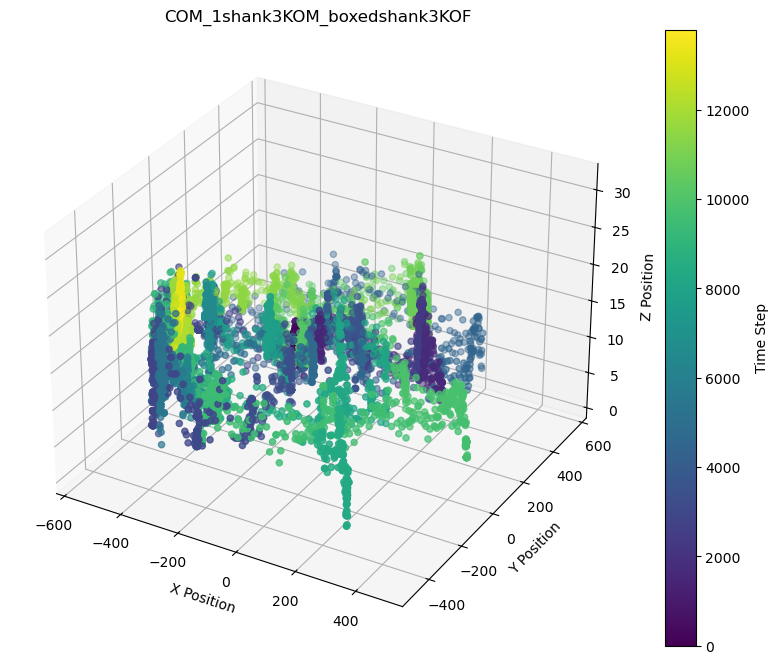

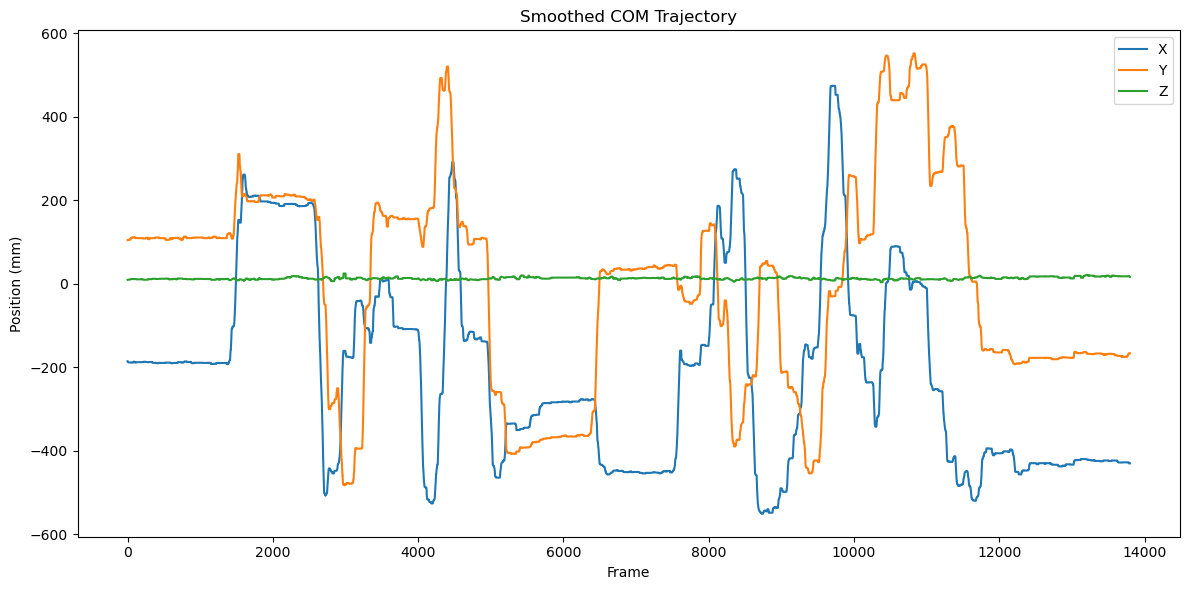

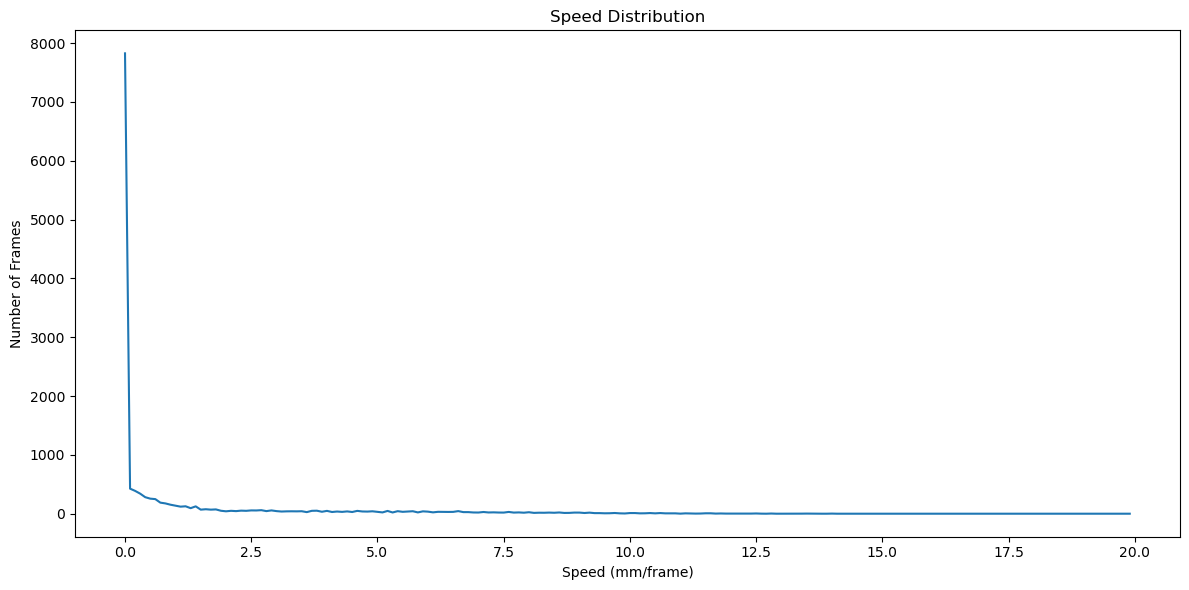

Analysis complete. Plots saved to: /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF/COM/predict00/vis
/hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF
plotting com_traga for /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF


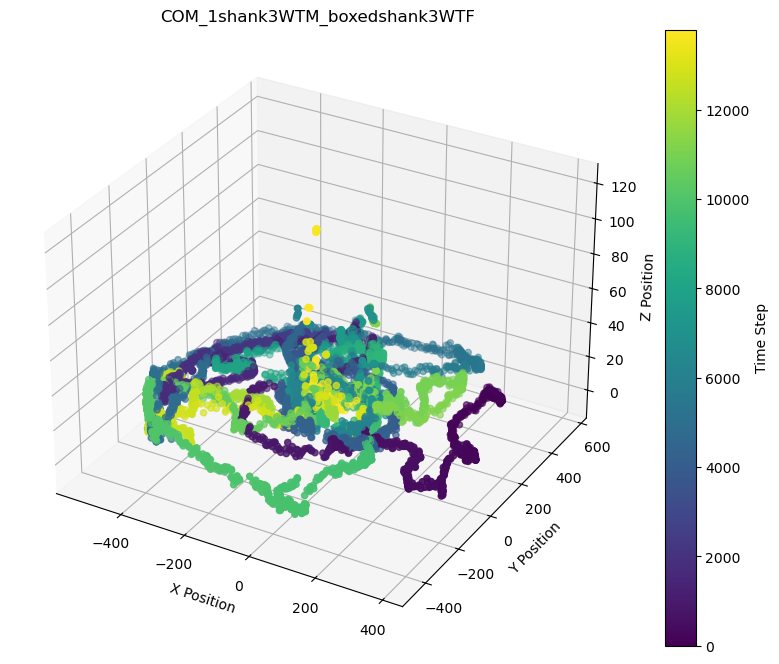

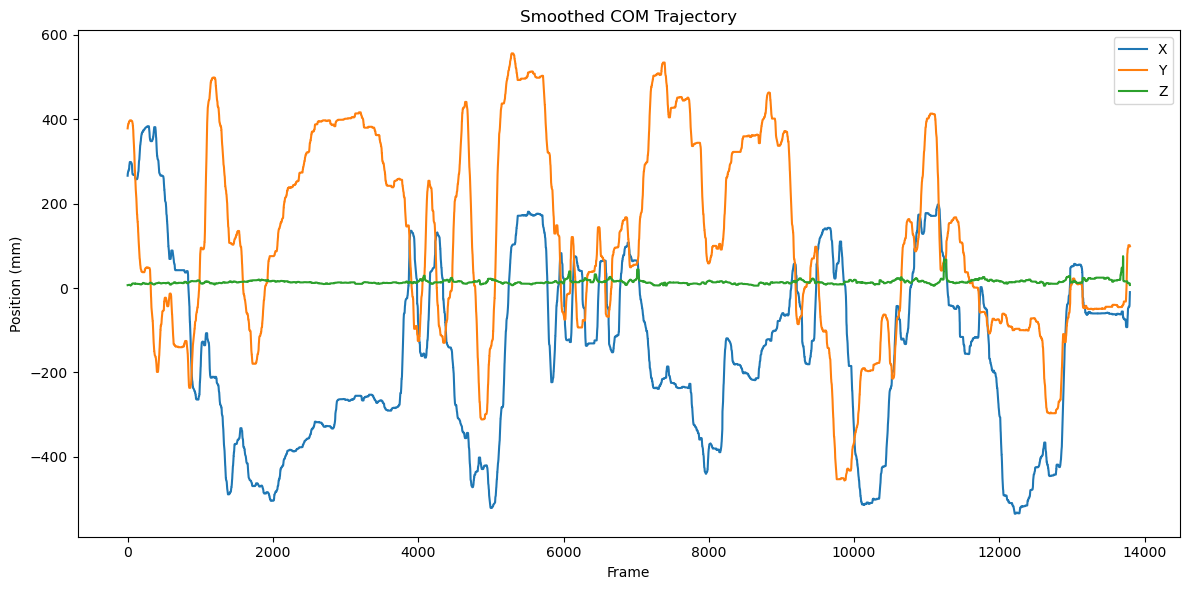

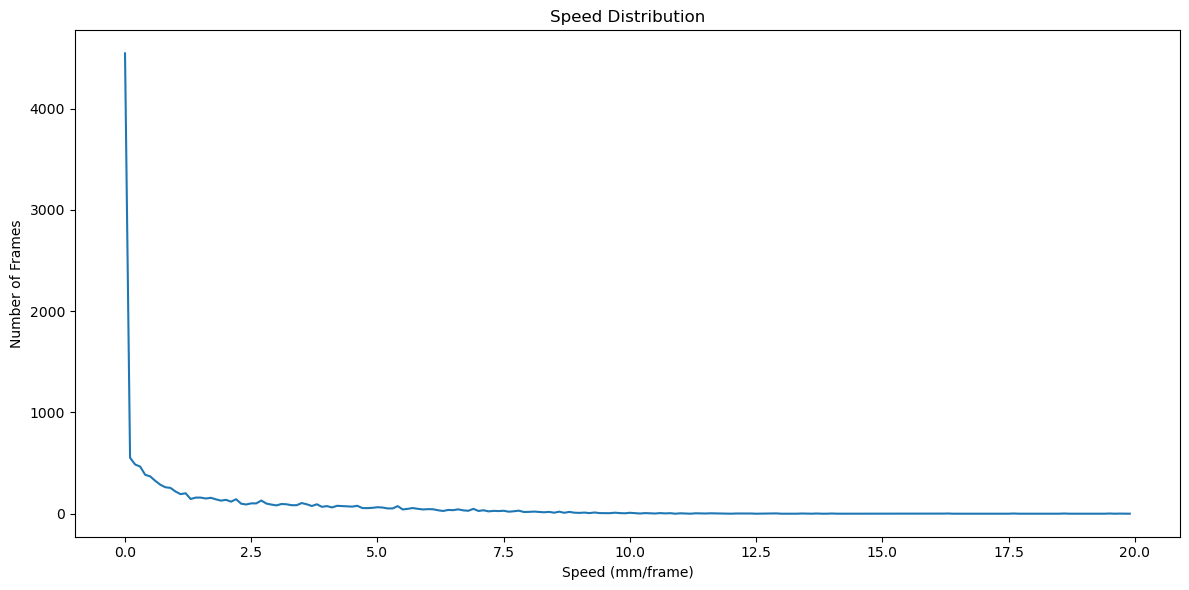

Analysis complete. Plots saved to: /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF/COM/predict00/vis


In [13]:
from utlis.vis_valid_utlis.com_trag_updated import plot_com_all

# Assume base_folder is defined elsewhere in your script
# base_folder = '/path/to/your/base/folder'

records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_com_vis['date_folder'], for_com_vis['rec_file'])
]

# Iterate through the records and process each one sequentially
for record in records:
    base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
    print(base_path)
    plot_com_all(base_path) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False


In [25]:
import pyarrow.compute as pc
table = all_df  # combined_df

# Filter dropf_handle == 1, com != 1, and social != 1
filter_mask = pc.and_(
    # pc.equal(table['dropf_handle'], '1'),
    pc.equal(table['com'], '1'),
    pc.not_equal(table['dannce'], '1'),
    # pc.not_equal(table['social'], '1')
    # pc.and_(
    #     pc.not_equal(table['dannce'], '1'),
    #     pc.not_equal(table['test'], '1'),
    #     # pc.equal(table['sync'], '1')
    # )
)

# filter_mask = pc.and_(
#     # pc.and_(
#         # pc.not_equal(table['date_folder'], '2024_11_06'),
        
#         # pc.and_(
#         #     pc.not_equal(table['date_folder'], '2024_11_06'),
#         #     # pc.and_(
#         #     #     pc.not_equal(table['date_folder'], '2024_11_06'),
#         #     #     pc.not_equal(table['date_folder'], '2024_09_18')
#         #     # ),
#         #     pc.not_equal(table['date_folder'], '2024_11_07')
#         # ),
#     pc.equal(table['com'], '1'),
#     # ),
#     pc.not_equal(table['social'], '1')
#     # pc.and_(
#     #     pc.not_equal(table['social'], '1'),
#     #     pc.equal(table['sync'], '1')
#     # )
# )

# Apply the filter and print the results
for_dannce = table.filter(filter_mask) #filter_mask

# Print each row of the filtered table
print(for_dannce.to_pandas())  # Display the filtered data in a familiar pandas-like format


  mir_generate_param sync dropf_handle com social miniscope test  \
0                  1    1            1   1      0         0    0   
1                  1    1            1   1      0         0    0   

  after_oxytocin before_oxytocin dannce            rec_file  \
0              0               0      0        20240819V1r2   
1              0               0      0  20240916v1r1_16_35   

                    scan_time date_folder                        calib_files  
0  2024-11-15T13:24:55.031844  2024_10_03                     [calib_for_v1]  
1  2024-11-15T13:24:55.025299  2024_10_14  [calib_after_17_43, calib_before]  


In [14]:
# below is to exclude the bad com dir mannually, by inserting things in a txt file...


from concurrent.futures import ThreadPoolExecutor
import os

for_dannce = for_com_vis

slurm_launch_file = '/hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py'

def check_expdir(expdir):
    if not os.path.exists(expdir):
        print(f"Skipping: Experiment directory {expdir} does not exist")
        return None  # Return None or skip processing this directory
    return expdir

# Function to create the full expdir path and print the command for dry-run
def run_command(base_path, date_folder, rec_file, partition='scavenger-gpu', dry_run=True):
    expdir_path = os.path.join(base_path, date_folder, rec_file)
    
    # Check if the experiment directory exists before running the command
    if check_expdir(expdir_path) is None:
        return  # Skip this execution if the directory does not exist
    
    command = f"conda run -n sdannce python {slurm_launch_file} --expdir {expdir_path} --predict_dannce --partition {partition}"  # --allow_overwrite removed by default.

    if dry_run:
        print(f"[DRY-RUN] Command: {command}")
    else:
        print(f"Executing command: {command}")
        os.system(command)

# Read the list of relative paths to skip from the .txt file
txt_file = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/1_point_com_rerun.txt'  # Update this to the path of your .txt file
rel_paths_to_skip = set()
with open(txt_file, 'r') as f:
    for line in f:
        rel_path = line.strip()
        if rel_path:
            rel_paths_to_skip.add(rel_path)

# print(rel_paths_to_skip)

# Extract relevant data from the filtered PyArrow Table `for_com_vis`
base_path = base_folder  # Ensure base_folder is defined
# base_path = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Adjust this base path as needed

records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_dannce['date_folder'], for_dannce['rec_file'])
]

# Run in parallel with dry-run enabled for testing
max_concurrent_jobs = 4  # Choose how many jobs to run in parallel

dry_run = False  # Set to False to execute commands

with ThreadPoolExecutor(max_workers=max_concurrent_jobs) as executor:
    futures = []
    futures = []
    for record in records:
        # Create the relative path (date_folder/rec_file)
        rel_path = os.path.join(record['date_folder'], record['rec_file'])
        expdir_path = os.path.join(base_path, rel_path)

        if expdir_path in rel_paths_to_skip:
            print(f"Skipping: {rel_path} is in the skip list")
            continue  # Skip this record if it's in the skip list

        # Submit the job to the executor
        futures.append(
            executor.submit(run_command, base_path, record['date_folder'], record['rec_file'], 'scavenger-gpu', dry_run)
        )


Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py --expdir /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF --predict_dannce --partition scavenger-gpuExecuting command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py --expdir /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF --predict_dannce --partition scavenger-gpu

Specified a single expdir; running predictions ...
Running predictions on 1 experiments ...
Running command:  cd /hpc/group/tdunn/tdunn/Bryan_Rigs/BigOpenField/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF
dannce predict dannce /hpc/group/tdunn/tqxli/sdannce_scripts/configs/dannce_mouse_config.yaml --dannce-predict-model=/hpc/group/tdunn/tqxli/sdannce_scripts/weights/DANNCE/train04_20241111_ft_mouse_demo/checkpoint-epoch60.pth --dannce-predi

In [21]:
import pyarrow.compute as pc
table = all_df  # combined_df

# Apply the filter and print the results
for_dannce_vis = table.filter(pc.equal(table['dannce'], '1')) #filter_mask

# Print each row of the filtered table
print(for_dannce_vis.to_pandas())  # Display the filtered data in a familiar pandas-like format


   mir_generate_param sync dropf_handle com social miniscope test  \
0                   1    1            0   1      0         0    0   
1                   1    1            0   1      0         0    0   
2                   1    1            0   1      0         0    0   
3                   1    1            0   1      0         0    0   
4                   1    1            0   1      0         0    0   
5                   1    1            0   1      0         0    0   
6                   1    1            0   1      0         0    0   
7                   1    1            0   1      0         0    0   
8                   1    1            0   1      0         0    0   
9                   1    1            1   1      0         0    0   
10                  1    1            0   1      0         0    0   
11                  1    1            0   1      0         0    0   
12                  1    1            0   1      0         0    0   
13                  1    1        

In [ ]:
# from useful_files.sophie_check_dannce_mir_modif import calculate_dis

# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.io as sio


# def dannce_valid(base_path):

#     # params_file_end = 'big_label3d_dannce.mat' # camera parameters
#     save_path = os.path.join(base_path, 'DANNCE/predict00', 'vis')
#     pred_mat = 'save_data_AVG.mat'
#     # Check if the savePath exists
#     if not os.path.exists(save_path):
#         os.makedirs(save_path)
#     temp_pred_mat = os.path.join(base_path, 'DANNCE/predict00',pred_mat)
#     # ground truth according to true labels
#     ground_truth_average = [19.18, 50.93, 10.59, 10.8]
#     ground_truth_std = [2.9, 8, 2.36, 2.48]
#     labels = ['BetweenEars', 'Trunk', 'LeftHind', 'RightHind']

#     # Check if the prediction file exists
#     if not os.path.exists(temp_pred_mat):
#         print(f"Prediction file '{pred_mat}' not found in '{base_path}'.")
#         return

#     # Load prediction data
#     try:
#         pre = sio.loadmat(temp_pred_mat)['pred']
#     except Exception as e:
#         print(f"Error loading prediction data from '{temp_pred_mat}': {e}")
#         return

#     # Calculate distances
#     pre_dis1 = calculate_dis(0, 1, pre)
#     pre_dis2 = calculate_dis(3, 5, pre)
#     pre_dis3 = calculate_dis(16, 17, pre)
#     pre_dis4 = calculate_dis(19, 20, pre)

#     # Compute averages and standard deviations, ignoring NaN values
#     pred_average = [
#         np.nanmean(pre_dis1),
#         np.nanmean(pre_dis2),
#         np.nanmean(pre_dis3),
#         np.nanmean(pre_dis4)
#     ]
#     pred_std = [
#         np.nanstd(pre_dis1),
#         np.nanstd(pre_dis2),
#         np.nanstd(pre_dis3),
#         np.nanstd(pre_dis4)
#     ]

#     # Plotting
#     size = 4
#     total_width, n = 0.8, 2
#     x = np.arange(size)
#     width = total_width / n
#     x_shifted = x - (total_width - width) / 2  # Adjust the x position for better alignment

#     plt.figure(figsize=(10, 6))
#     plt.bar(x_shifted, ground_truth_average, width=width, yerr=ground_truth_std, label='GroundTruth', capsize=5)
#     plt.bar(x_shifted + width, pred_average, width=width, yerr=pred_std, label='Prediction', capsize=5)
#     plt.xticks(x + width / 2, labels)
#     plt.xlabel('Segments')
#     plt.ylabel('Distance (mm)')
#     plt.title(os.path.basename(os.path.dirname(base_path)) +'_'+ os.path.basename(base_path))
#     plt.legend(loc='best')
#     plt.tight_layout()
    

#     # Save the plot
#     save_name = os.path.join(save_path, f"{os.path.basename(os.path.dirname(base_path))}_{os.path.basename(base_path)}.jpg")
#     try:
#         plt.savefig(save_name)
#         print(f"Plot saved as '{save_name}'.")
#     except Exception as e:
#         print(f"Error saving plot '{save_name}': {e}")
    
#     plt.show()
#     plt.close()

In [ ]:
from useful_files.sophie_check_dannce_mir_modif import dannce_valid

records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_dannce_vis['date_folder'], for_dannce_vis['rec_file'])
]

# Iterate through the records and process each one sequentially
# for record in records:
#     base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
#     print(base_path)
#     try:
#         dannce_valid(base_path) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False
#     except Exception as e:
#         print(f"An error occurred while processing {base_path}: {e}")
#         # Skip to the next record if an error occurs
#         continue

#trying for parallel processing again:
from concurrent.futures import ProcessPoolExecutor, as_completed

def process_record(record):
    base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
    print(base_path)
    try:
        dannce_valid(base_path)
    except Exception as e:
        print(f"An error occurred while processing {base_path}: {e}")
        # Skip to the next record if an error occurs
        pass

with ProcessPoolExecutor() as executor:
    futures = [executor.submit(process_record, record) for record in records]
    for future in as_completed(futures):
        pass  # You can retrieve results or handle exceptions here if needed


NameError: name 'for_com_vis' is not defined